#### Load needed modules

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import cryptofxns
from matplotlib import pyplot as plt
%matplotlib inline

FileNotFoundError: [Errno 2] No such file or directory: '../FILES/GenotoFiltGeno2016-04-07.csv'

## Bring in Haplotype filtered genotype dataframe

In [ ]:
#geno = pd.read_csv('../FILES/FiltGenotoHapFiltGeno2017-02-22.csv',index_col=0);
file_end = 'min-Geno-k6000.csv'
geno = pd.read_csv('../FILES/FiltGenotoHapFiltGeno-%s'%file_end)

#### View geno dataframe

In [3]:
geno.head()

,Alt,Chrom,Pos,Ref,SS-B307,SS-B308,SS-B310,SS-B311,SS-B312,SS-B313,...,SS-C029_Correction,SS-C031_Correction,SS-C033,SS-C036,SS-C039,SS-C242,SS-C271,SS-C272,SS-C290,SS-C291
0,A,Chr01,5016.0,C,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,C,Chr01,5299.0,T,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,C,Chr01,5464.0,T,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,C,Chr01,6120.0,T,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
4,A,Chr01,6166.0,G,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


#### Get the unique chromosome names

In [4]:
chrlist = np.unique(geno.Chrom.tolist());assert len(chrlist) == 14

#### Load chromosome lengths

In [5]:
clens = cryptofxns.chromosome_lengths;assert len(clens) == len(chrlist)

## Check that removed segregants are not being used in analysis

###### Load in the list of segregants we want to remove b/c of reasons listed in cryptofxns.py

In [6]:
seg_out = cryptofxns.geno_remove;print seg_out

['SS-B377', 'SS-B385', 'SS-B410', 'SS-B411', 'SS-B560', 'SS-B395', 'SS-B594', 'SS-C273', 'SS-B879', 'SS-B885', 'SS-B593']


In [7]:
tc = cryptofxns.thecol;
segs = [seg for seg in geno.columns.tolist()[tc:] if seg not in seg_out]

In [8]:
len(segs)

94

#### Load the list of segregants from the bi-sexual ( a X alpha ) cross.
#### Seperate the progeny by cross type

In [9]:
seg_axalp = np.concatenate(cryptofxns.axalp);print len(seg_axalp)
seg_bi = [seg for seg in segs if seg in seg_axalp];print len(seg_bi);
seg_un = [seg for seg in segs if seg not in seg_axalp];print len(seg_un);
assert len(seg_un) + len(seg_bi) == len(segs)

42
39
55


In [10]:
reload(cryptofxns);
cryptofxns.axalp

[['SS-B869_Correction',
  'SS-B872_Correction',
  'SS-B873_Correction',
  'SS-B874_Correction'],
 ['SS-B876', 'SS-B880', 'SS-B879', 'SS-B885'],
 ['SS-B886_Correction', 'SS-B887_Correction'],
 ['SS-B890_Correction',
  'SS-B896_Correction',
  'SS-B898_Correction',
  'SS-B892_Correction',
  'SS-B901_Correction',
  'SS-B905',
  'SS-B906_Correction',
  'SS-B908_Correction'],
 ['SS-B926', 'SS-B927', 'SS-B929', 'SS-B930'],
 ['SS-B952', 'SS-B956'],
 ['SS-B960_Correction', 'SS-B961_Correction'],
 ['SS-B996', 'SS-B997', 'SS-B998'],
 ['SS-C001'],
 ['SS-C026_Correction', 'SS-C029_Correction'],
 ['SS-C031_Correction'],
 ['SS-C033', 'SS-C036', 'SS-C039'],
 ['SS-C242'],
 ['SS-C271', 'SS-C272'],
 ['SS-C273'],
 ['SS-C290', 'SS-C291']]

In [11]:
xBasidium = []
for bas in cryptofxns.axalp:
    Basidium_temp = []
    for seg in bas:
        if seg not in seg_out:
            Basidium_temp.append(seg)
    xBasidium.append(Basidium_temp)
xBasidium = [bas for bas in xBasidium if len(bas)>0]

In [12]:
xBasidium

[['SS-B869_Correction',
  'SS-B872_Correction',
  'SS-B873_Correction',
  'SS-B874_Correction'],
 ['SS-B876', 'SS-B880'],
 ['SS-B886_Correction', 'SS-B887_Correction'],
 ['SS-B890_Correction',
  'SS-B896_Correction',
  'SS-B898_Correction',
  'SS-B892_Correction',
  'SS-B901_Correction',
  'SS-B905',
  'SS-B906_Correction',
  'SS-B908_Correction'],
 ['SS-B926', 'SS-B927', 'SS-B929', 'SS-B930'],
 ['SS-B952', 'SS-B956'],
 ['SS-B960_Correction', 'SS-B961_Correction'],
 ['SS-B996', 'SS-B997', 'SS-B998'],
 ['SS-C001'],
 ['SS-C026_Correction', 'SS-C029_Correction'],
 ['SS-C031_Correction'],
 ['SS-C033', 'SS-C036', 'SS-C039'],
 ['SS-C242'],
 ['SS-C271', 'SS-C272'],
 ['SS-C290', 'SS-C291']]

In [13]:
genof = geno[geno.columns.tolist()[:4] + seg_un + seg_bi]

## Check that SNPs are dropped if they have < 100% call rate

In [14]:
genodf = genof.dropna(axis=0,how='any').reset_index(drop=True);

In [15]:
genodf.shape

(86767, 98)

### Find SNP desert within chrom 7

In [16]:
chr_7_geno = genodf[genodf.Chrom=='Chr07'].copy()
chr_7_geno.reset_index(drop=True,inplace=True)
chr_7_values = chr_7_geno.Pos.values

In [17]:
chr_7_snp_dist = chr_7_values[1:] - chr_7_values[:-1];

In [18]:
np.where(chr_7_snp_dist == np.max(chr_7_snp_dist))[0][0]

4856

In [19]:
chr_7_geno.ix[4856-1:4856+2,:]

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Alt,Chrom,Pos,Ref,SS-B307,SS-B308,SS-B310,SS-B311,SS-B312,SS-B313,...,SS-C029_Correction,SS-C031_Correction,SS-C033,SS-C036,SS-C039,SS-C242,SS-C271,SS-C272,SS-C290,SS-C291
4855,G,Chr07,1048031.0,A,1,1,1,1,1,1,...,0,1,1,0,1,1,0,0,1,1
4856,T,Chr07,1048126.0,C,1,1,1,1,1,1,...,0,1,1,0,1,1,0,0,1,1
4857,C,Chr07,1101035.0,G,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
4858,A,Chr07,1101217.0,G,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1


## Define the slope and intercept from our genome wideregression analysis

### PATCH Sep 2107 Passion regression

### This analysis was carried out in Crypto-2-GTC ... 

## Load in resutls

In [20]:
gw_res = pd.read_csv('../FILES/Crypto-Genome-wide-Analysis-results-min-haplotype-k6000.csv',index_col=0)

In [21]:
gw_res

,Intercept,Slope,cM
Uni,0.533046,1.236400,8.087998
Bi,0.281819,1.934178,5.170154


#### For the progeny from the uni-sexual reproduction

In [22]:
aun = gw_res['Intercept']['Uni'];print aun
bun = gw_res['Slope']['Uni'];print bun

0.533046388943
1.23639983684


#### For the progeny from the bi-sexual reproduction

In [23]:
abi = gw_res['Intercept']['Bi']; print abi
bbi = gw_res['Slope']['Bi']; print bbi

0.281818843717
1.93417840436


# Define Intercept and slope from bisexual cross since they have higher expected cross over

In [24]:
Intercept = 0.98
UnS = 1.30
BiS = 1.768

## Find the breakpts and number of crossovers per IMI

###### Per chromosome

### Break up genotype dataframes by mode of reproduction 

In [25]:
genodfbi = genodf[genodf.columns.tolist()[:4]+seg_bi];print genodfbi.shape
genodfun = genodf[genodf.columns.tolist()[:4]+seg_un];print genodfun.shape

(86767, 43)
(86767, 59)


# IMI, Possion Recombination Analysis

#### For all the progeny pooled

In [26]:
dfxtet = [genodf[genodf.columns.tolist()[:4]+basidium] for basidium in xBasidium]

In [27]:
len(dfxtet)

15

In [28]:
dfxtet.append(genodfun) ## Add the genotype df for the unisexually produced segregants

In [29]:
len(dfxtet)

16

In [30]:
hotIMIdfsXBasidium = [cryptofxns.IMIandCON(df) for df in dfxtet]
hotIMIdfun = cryptofxns.IMIandCON(genodfun)#,aun,bun);
hotIMIdfbi = cryptofxns.IMIandCON(genodfbi)#,abi,bbi);

In [31]:
len(hotIMIdfsXBasidium[-1])

86753

In [32]:
len(hotIMIdfsXBasidium)

16

In [33]:
hotIMIdf = hotIMIdfsXBasidium[-1].copy()

In [34]:
hotIMIdf[(hotIMIdf.Chrom=='Chr07')&(hotIMIdf.XO>49)].index.tolist()[0] ## Remove genetic marker

53540

In [35]:
hotIMIdf.ix[hotIMIdf[(hotIMIdf.Chrom=='Chr07')&(hotIMIdf.XO>49)].index.tolist()[0],'XO'] = 0

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [36]:
oldtemp = hotIMIdf.copy()

In [37]:
IMIdfindex = hotIMIdf.index.tolist()

## For the basidiums, take unique crossover events 

In [38]:
for df in hotIMIdfsXBasidium[:-1]:
    for i in IMIdfindex:
        if df.ix[i,'XO'] > 0:
            hotIMIdf.ix[i,'XO'] = hotIMIdf.ix[i,'XO'] + 1

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


### Check our work

In [39]:
for i in IMIdfindex:
    assert hotIMIdf.ix[i,'XO'] >= oldtemp.ix[i,'XO']

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


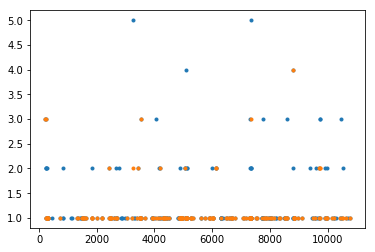

In [40]:
plt.plot(hotIMIdf[(hotIMIdf.Chrom=='Chr01')&(hotIMIdf.XO>0)].XO,'.');
plt.plot(oldtemp[(oldtemp.Chrom=='Chr01')&(oldtemp.XO>0)].XO,'.');

## Collapse dataframes into one

In [41]:
## Add the cross overs seperated via mating group
hotIMIdf['uXO'] = hotIMIdfun['XO']
hotIMIdf['bXO'] = hotIMIdfbi['XO']
## Add positional vector
hotIMIdf['Pos'] = [np.mean([hotIMIdf.W[i],hotIMIdf.V[i]]) for i in hotIMIdf.index.tolist()]
hotIMIdf = hotIMIdf[hotIMIdf.IMI>1]

In [42]:
hotIMIdf[hotIMIdf.IMI==0]

,Chrom,W,V,IMI,XO,uXO,bXO,Pos


In [43]:
reload(cryptofxns);

In [44]:
len(hotIMIdf[hotIMIdf.IMI>0])

82961

In [45]:
hotIMIdf[(hotIMIdf.IMI==1) & (hotIMIdf.XO > 0)]

,Chrom,W,V,IMI,XO,uXO,bXO,Pos


In [46]:
hotIMIdf = hotIMIdf[hotIMIdf.IMI>0].reset_index(drop=True).copy()

In [47]:
centromeredf = cryptofxns.load_centrom_locs();
centromeredf.tail()

,0,1
Chr10,802373,882178
Chr11,139615,178627
Chr12,129462,176276
Chr13,122411,182012
Chr14,568029,644419


In [48]:
hotIMIdf[(hotIMIdf.Chrom=='Chr12') &(hotIMIdf.W > 129462) & (hotIMIdf.V < 176276) & (hotIMIdf.XO > 0)]

,Chrom,W,V,IMI,XO,uXO,bXO,Pos
72854,Chr12,129848.0,129909.0,60,1.0,1.0,0.0,129878.5


In [49]:
hotIMIdf[(hotIMIdf.Chrom=='Chr01') &(hotIMIdf.W > 937505) & (hotIMIdf.V < 998062) & (hotIMIdf.XO > 0)]

,Chrom,W,V,IMI,XO,uXO,bXO,Pos
4633,Chr01,997193.0,997598.0,404,1.0,0.0,1.0,997395.5


In [50]:
for chrom in chrlist:
    print hotIMIdf[(hotIMIdf.Chrom==chrom) & (hotIMIdf.W > centromeredf.T[chrom][0]) &
                   (hotIMIdf.V < centromeredf.T[chrom][1]) ].XO.sum()

1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0


In [51]:
cent_drop_in = []
for chrom in chrlist:
    cent_drop_in.append(hotIMIdf[(hotIMIdf.Chrom==chrom) & (hotIMIdf.W > centromeredf.T[chrom][0]) &
                   (hotIMIdf.V < centromeredf.T[chrom][1]) ].index.tolist())

In [52]:
assert len(np.unique(np.concatenate(cent_drop_in))) == len(np.concatenate(cent_drop_in))

In [53]:
cent_drop_in = np.concatenate(cent_drop_in)

In [54]:
hotIMIdf_centdrop = hotIMIdf.drop(cent_drop_in)

In [55]:
len(hotIMIdf)

82961

In [56]:
hotIMIdf_centdrop.reset_index(inplace=True,drop=True)

In [57]:
len(hotIMIdf_centdrop)

82132

# Windowed Recombination Hot Spot Analysis

In [58]:
def poisson_test(X,MuXws,twosided=True,hotorcold=True,COmax=31,nsegs = 94,ws=7.5e4,Mb=1e6):
    maxX = max(X)
    if maxX > COmax:
        COmax = maxX + 2
    #MuXws = (a + (b/(Mb))*ws*nsegs)
    Co_rang = np.arange(0,COmax);
    Pvals = ss.poisson.pmf(Co_rang-1,MuXws);
    #plt.plot(Co_rang,Pvals);
    pval = [];
    if twosided is True:
        for x in X: ## Two sided test, looking for hot and cold spots. 
            if (x > -1) and (x < MuXws):
                pval.append(ss.poisson.cdf(x,MuXws))##sum([ss.poisson.pmf(x+1,MuXws) for x in range(0,int(x+1))]))
            elif (x > -1) and (x >= MuXws):
                pval.append(ss.poisson.sf(x,MuXws))#sum([ss.poisson.pmf(x-1,MuXws) for x in range(int(x),int(COmax))]))
            else:
                pval.append(1)
    else: ## One side test, searching for either just hot or just cold. 
        if hotorcold is True:
            pval = [sum([ss.poisson.pmf(x-1,MuXws) for x in range(int(x),int(COmax))]) for x in X 
                    if x not in [np.nan]];
        else:
            pval = [sum([ss.poisson.pmf(x+1,MuXws) for x in range(0,int(x+1))]) for x in X if x not in [np.nan]];
    return pval#,MuXws

def bins_corrdinates(temp,centdf,clen,ws,lim=2.0):
            ## constuct bins
    midpt = round(clen/2.0) ## find mid point of chomosome
    Vend = temp.V.max() ## Farthest marker to the right
    Wsta = temp.W.min() ## Earliest marker from the left
    rbin = [];rbin.append(midpt)
    lbin = [];lbin.append(midpt)
    while rbin[-1] < Vend -(ws/lim): ## Right
        rbin.append(rbin[-1]+ws)
    while lbin[-1] > Wsta + (ws/lim):## Left
        lbin.append(lbin[-1]-ws)
    bins_cor = sorted(lbin)[:-1] + rbin
    cent_drop = [i for i in range(len(bins_cor)-1) if (bins_cor[i] >= centdf[0]) & (bins_cor[i+1] <= centdf[1])]
    for i in cent_drop:
        bins_cor.pop(i) 
    return bins_cor

def bins_corrdinates2(temp,centdf,clen,ws,lim=2.0):
    ## constuct bins from centromeres. 
    midpt = round(clen/2.0) ## find mid point of chomosome
    Vend = temp.V.max() ## Farthest marker to the right
    Wsta = temp.W.min() ## Earliest marker from the left
    rbin = [centdf[1]];#rbin.append(midpt)
    lbin = [centdf[0]];#lbin.append(midpt)
    while rbin[-1] < Vend -(ws/lim): ## Right
        rbin.append(rbin[-1]+ws)
    while lbin[-1] > Wsta + (ws/lim):## Left
        lbin.append(lbin[-1]-ws)
    bins_cor = sorted(lbin)[:-1] + rbin
    cent_drop = [i for i in range(len(bins_cor)-1) if (bins_cor[i] >= centdf[0]) & (bins_cor[i+1] <= centdf[1])]
    for i in cent_drop:
        bins_cor.pop(i) 
    return bins_cor
    
def bined_recomb(df,centromers,clens,ws,chrlist=None,XO='XO',verbose = False):
    if chrlist is None:
        chrlist = df.Chrom.unique().tolist()
    chrom_COs = [];chrom_bins=[];
    for ch,chrom in enumerate(chrlist):
        temp = df[df.Chrom == chrom];
        tempCOs = []#start = temp.W.min()
        bins = bins_corrdinates2(temp,centromers.T[chrom],clens[ch],ws) ## calculate bins
        for i in range(len(bins)-1):#while start+(ws/2.0) < temp.V.max():#clens[int(chrom[3:])-1]:
            wintemp = temp[(temp.V > bins[i])&
                           (temp.W < bins[i+1])]#wintemp = temp[(temp.V > start)&(temp.W < start + ws)];
            if len(wintemp) > 1:#0:
                tempCOs.append(int(wintemp[XO].sum()))   
            else:
                tempCOs.append(-1)
                if verbose == True:
                    print "No markers",chrom,ws#, start, start + ws
                
            #start = start + ws
        chrom_COs.append(tempCOs)
        chrom_bins.append(bins)
    return chrom_COs,chrom_bins

def HB(s,alpha):
    n = len(s);
    print n
    bi = sorted(range(len(s)), key=lambda k: s[k]);
    res = [];
    for i,bix in enumerate(bi):
        print bi
        hb = float(alpha) / (n - i)
        print s[bix]
        print hb
        if s[bix] < hb:
            res.append(bix)
        else:
            print 'finished'
            break
    return res

templ = bins_corrdinates(hotIMIdf[(hotIMIdf.Chrom=='Chr14')],clens[-1],41500)
tempr = np.array(templ) + 41500

len(templ)

cent_drop = [i for i in range(len(templ)-1) if (templ[i] >= 568029) & (templ[i+1] <= 644419)]

for i in cent_drop:
    templ.pop(i) 

len(templ)

In [59]:
len([a for a in hotIMIdf.IMI.tolist() if a < 53000]) / float(len(hotIMIdf.IMI.tolist()))

0.9999397307168428

In [60]:
from statsmodels.sandbox.stats.multicomp import multipletests as mltptest
## THE CONTROL OF THE FALSE DISCOVERY RATE IN MULTIPLE TESTING UNDER DEPENDENCY
## By Yoav Benjamini and Daniel Yekutieli
## The Annals of Statistics 2001, Vol. 29, No. 4, 1165–1188

## Define Variables

In [61]:
Mb = 1000**2; ## A megabase
nsegs = 94; ## Number of segregants
al = 0.05/2; ## my alpha level
#Ws = 52500 ## Window size determined previously

## Define Windows

In [62]:
#acM = round(gw_res['cM']['Bi']*1000) ## A centiMorgan
#Ws = acM*10 ## 10X a centimorgan
delta_wss = 500
wss_start = delta_wss
wss_max = 100000 + delta_wss
wss = sorted(list(np.arange(wss_start,wss_max,delta_wss)))#+[acM,Ws]) ## Windows 

delta_wss = 250
wss_start = 50000 
wss_max = 60000 + delta_wss
wss = sorted(list(np.arange(wss_start,wss_max,delta_wss)) + [51700,52500])

## Explore the effect of window size on hot and cold spot detection

wss_results = [];
for ws in wss:
    n = [];
    #MuX = (abi + (bbi/(Mb))*ws*nsegs); ## The Poisson average using linear anova results 
    #MuX = Intercept + (BiS/Mb)*ws*nsegs ## using Poisson regression results
    MuX = (1.3*(1.77**(float(Mb)/Mb))/1)*(float(ws)/Mb)*nsegs
    print MuX,ws
    wind_cos,wind_bins = bined_recomb(hotIMIdf,centromeredf,clens,ws=ws,verbose=False) 
    COMax = np.max(np.concatenate(wind_cos))
    #wind_pval = [poisson_test(w,abi,bbi,COmax=COMax,ws=ws) for w in wind_cos]
    wind_pval = [poisson_test(w,MuX,COmax=COMax,ws=ws) for w in wind_cos]
    test = mltptest(np.concatenate(wind_pval),method='fdr_by',alpha=al)
    for i,a in enumerate(test[0]):
        if a == True:
            if np.concatenate(wind_cos)[i] < MuX:
                n.append(0)
            else:
                n.append(1)
    wss_results.append(n);

Total_spots = []
n_hot_spots = []
n_col_spots = []
for wss_ in wss_results:
    Total_spots.append(len(wss_))
    n_hot_spots.append(len([a for a in wss_ if a == 1]))
    n_col_spots.append(len([b for b in wss_ if b == 0]))

mindifs = [abs(n_col_spots[i]- n_hot_spots[i]) for i,b in enumerate(n_col_spots)]
minix = mindifs.index(np.min(mindifs))

plt.plot(wss,n_hot_spots,'r.',alpha=0.5,label='Hot Spots');
plt.plot(wss,n_col_spots,'b.',alpha=0.5,label='Cold Spots');
plt.xlabel('Bin Size (bp)',fontsize='16');plt.legend();
plt.ylabel('Number of Significant Bins',fontsize='16');
plt.vlines(wss[minix],-10,n_col_spots[minix],linestyle='--',linewidth=.5);
plt.ylim(-1,400);plt.tight_layout();
#plt.savefig('../FIGS/Crypto-04-Simulation-on-binsize-HandC-Genome-Wide-%s-Feb2018.png'%wss[minix],dpi=1200,bbox_inches='tight')

# Remove IMI in URA5 region

In [63]:
uraWs = 5000
reload(cryptofxns)
A =  cryptofxns.ura5_start - uraWs
B =  cryptofxns.ura5_end + uraWs
NAT_chr7_region_in = hotIMIdf[(hotIMIdf.Chrom == 'Chr07') & (hotIMIdf.V > A) & (hotIMIdf.W < B)].index.tolist()
print len(NAT_chr7_region_in)
hotIMIdf.drop(NAT_chr7_region_in,inplace=True)
print NAT_chr7_region_in[0] in hotIMIdf.index.tolist()

9
False


In [66]:
Ws = 41500#wss[minix]#32500#50000#51700#100000.0#51700
bi_inter = 1.295915
co_rate =  1.768042
MuX = (bi_inter*(co_rate**(float(Mb)/Mb)))*(float(Ws)/Mb)*nsegs
print MuX,Ws

8.93809661103 41500


In [67]:
#MuX = (abi + (bbi/(Mb))*Ws*nsegs); ## The poisson average. 
wind_cos,wind_bins = bined_recomb(hotIMIdf,centromeredf,clens,Ws,verbose=True) 
COMax = np.max(np.concatenate(wind_cos))
wind_pval = [poisson_test(w,MuX,COmax=COMax,ws=Ws) for w in wind_cos]
test1 = mltptest(np.concatenate(wind_pval),method='fdr_by',alpha=al)

No markers Chr05 41500


In [68]:
len(wind_cos[0])

53

In [69]:
len([a for a in test1[0] if a == True])

84

In [70]:
wind_pvals_lens = [len(wind_pval[i]) for i in range(14)]

In [71]:
wind_pvals_lens

[53, 38, 48, 41, 34, 33, 31, 25, 27, 24, 23, 20, 17, 16]

In [72]:
tempindex = [0]
for i in range(14):
    tempindex.append(tempindex[i] + wind_pvals_lens[i])

In [73]:
tempindex

[0, 53, 91, 139, 180, 214, 247, 278, 303, 330, 354, 377, 397, 414, 430]

In [74]:
new_test1_index = []
for i in range(14):
    new_test1_index.append(test1[0][tempindex[i]:tempindex[i+1]])

In [75]:
for i in range(14):
    assert len(new_test1_index[i]) == len(wind_pval[i])

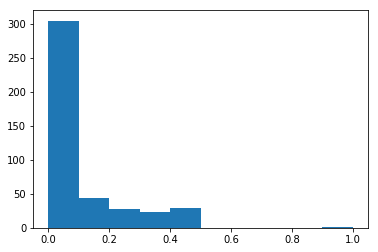

In [76]:
plt.hist(np.concatenate(wind_pval));

In [77]:
max(test1[1][test1[0]])

0.01368528643310065

In [78]:
centromere = cryptofxns.load_centrom_locs();
## MAT locus
mats = 1529240
matst = 1661861
signiflist = ['Chr01','Chr02','Chr04','Chr05','Chr08','Chr09']
chrompatch = [0,1,3,4,7,8]

In [79]:
len(wind_pval)

14

new_chrom_len = [round(a,2) for a in np.array(clens)/(1000.0**2)]
new_chrom_label = ['Chromosome ' + str(int(chrom[3:])) + '\n       '+str(new_chrom_len[ch])+' Mb' for ch,chrom in enumerate(chrlist)]

In [80]:
new_chrom_label = [str(int(chrom[3:])) for chrom in chrlist]

In [81]:
new_chrom_label

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']

In [82]:
print [np.mean(hotIMIdf[hotIMIdf.Chrom==chom]['XO'])/len(segs) for chom in chrlist]

[0.00032822334633355216, 0.0004135313959522574, 0.00036140450042393125, 0.00033212119949152893, 0.00037778996215413833, 0.00031836526781865916, 0.0003046248581137194, 0.00048740402974373025, 0.00033727223965021217, 0.00039375061523533637, 0.00035274582512410626, 0.0003545153916402434, 0.0004462530348327019, 0.0004047524954425506]


In [83]:
print [np.max(hotIMIdf[hotIMIdf.Chrom==chom]['XO']) for chom in chrlist]
print [np.max(hotIMIdf[hotIMIdf.Chrom==chom]['XO']) - (np.max(hotIMIdf[hotIMIdf.Chrom==chom]['XO'])/2) for chom in chrlist]

[5.0, 10.0, 4.0, 4.0, 4.0, 11.0, 5.0, 40.0, 4.0, 4.0, 3.0, 4.0, 6.0, 15.0]
[2.5, 5.0, 2.0, 2.0, 2.0, 5.5, 2.5, 20.0, 2.0, 2.0, 1.5, 2.0, 3.0, 7.5]


In [84]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

ws = Ws
HoC_geno = []
fig, ax = plt.subplots(nrows=14,figsize=(7,10),sharex=False);
 
for ch,a in enumerate(chrlist):#chrom in chrlist:
    test = hotIMIdf[hotIMIdf.Chrom==chrlist[ch]];
    start = test.W.min()
    hot_region = wind_pval[ch]
    hot_cold_sig = new_test1_index[ch]
    hot_rec = wind_cos[ch]
    hot_win = wind_bins[ch]
    y = test['XO']##/len(segs)
    x = test['Pos']
    myylimmax = np.max(y)
    if myylimmax > 5:
        axn = ax[ch] 
        divider = make_axes_locatable(axn)
        ax2 = divider.new_vertical(size='100%',pad=.1)
        fig.add_axes(ax2);
        axn.plot(x, y,'k--',alpha=.5,linewidth=.9);
        axn.set_ylim(-2,3)
        axn.set_yticks([2])
        axn.spines['top'].set_visible(False)
        ax2.plot(x, y,'k--',alpha=.5,linewidth=.9);
        ax2.set_ylim(myylimmax-3, myylimmax+.5)
        ax2.tick_params(bottom="off", labelbottom='off')
        ax2.spines['bottom'].set_visible(False)
        #d = .005 
        #kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
        #ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
        #ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

        #kwargs.update(transform=axn.transAxes)  # switch to the bottom axes
        #axn.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
        #axn.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
        axn.set_xlim(0,clens[0]+500000)
        ax2.set_xlim(0,clens[0]+500000)
        ax2.spines["right"].set_visible(False)
        ax2.spines["top"].set_visible(False)
        ax2.spines["bottom"].set_visible(False)
        plt.sca(axn)
        plt.broken_barh([(centromere[0][chrlist[ch]],
                    centromere[1][chrlist[ch]]-centromere[0][chrlist[ch]])],
                    (0.0,-1),##/len(segs)),
                    facecolors='black',alpha =.7);
        if ch < 13:
            plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off');
    else:
        plt.sca(ax[ch])
        ax[ch].set_ylim(-1.5,5)
        ax[ch].set_yticks([1,3,5])
        ax[ch].plot(x,y,'k--',alpha=.5,linewidth=.9);
        ax[ch].set_xlim(0,clens[0]+500000)
    plt.sca(ax[ch])
    plt.broken_barh([(centromere[0][chrlist[ch]],
                      centromere[1][chrlist[ch]]-centromere[0][chrlist[ch]])],
                    (0.0,-.5),##/len(segs)),
                    facecolors='black',alpha =.7);
   ## plt.text(clens[0]+250000,0.01,new_chrom_label[ch],fontsize=14)
    HoC_chrom = []
    for i, win in enumerate(hot_rec):
        if hot_cold_sig[i] == True:
            if win < MuX:
                fcol = 'blue';HoC_chrom.append('Blue');

            else:
                fcol = 'red';HoC_chrom.append('Red')
                plt.text((hot_win[i]+(ws/2)),-1.5,str(int(win)),fontsize=9,
                   verticalalignment='center',horizontalalignment='center');
            plt.broken_barh([(hot_win[i],ws)],(0,5),facecolor=fcol,alpha=.2);
            if myylimmax > 5:
                ax2.broken_barh([(hot_win[i],ws)],(0,myylimmax),facecolor=fcol,alpha=.2);
        else:
            HoC_chrom.append('Black')
        
    HoC_geno.append(HoC_chrom)
    plt.sca(ax[ch])
    if ch == 3: ## chrom 4
        plt.broken_barh([(mats,
                      matst-mats)],
                    (0.0,-.5),
                    facecolors='g',alpha =.6);
    if ch < 13:
        plt.tick_params(axis='x',which='both',bottom='off',
                       top='off',labelbottom='off')
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    
    plt.tight_layout();
plt.gcf().subplots_adjust(bottom=0.10,left=0.1,hspace=0.40);
fig.text(0.125,0.05,'Chromosomal Coordinates (Base Pairs)',fontsize=18);
fig.text(0.0009, 0.5, 'Crossover Counts',##'Recombination Frequency', 
         va='center', rotation='vertical',fontsize=18);
##fig.savefig('../FIGS/Crypto-Hot-Cold-Spot-%s-Jan2018.pdf'%ws,dpi=1200);

In [85]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font

u'/Users/croth/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

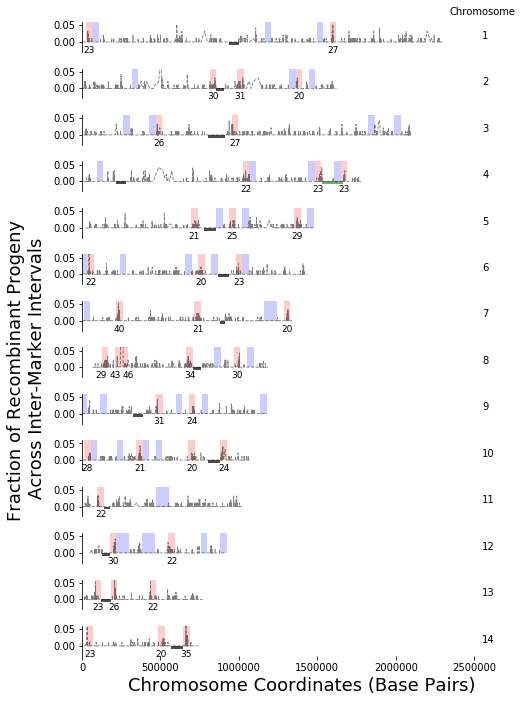

In [110]:
ws = Ws
HoC_geno = []
fig, ax = plt.subplots(14,1,figsize=(7,10),sharex=True,sharey=True);
text_addjust = np.array([-25000,-20000,22500,0,0])
for ch,a in enumerate(chrlist):#chrom in chrlist:
    test = hotIMIdf[hotIMIdf.Chrom==chrlist[ch]];
    start = test.W.min()
    hot_region = wind_pval[ch]
    hot_cold_sig = new_test1_index[ch]
    hot_rec = wind_cos[ch]
    hot_win = wind_bins[ch]
    y = test['XO'].values/len(segs)
    plt.sca(ax[ch])
    plt.plot(test['Pos'],y,'k--',alpha=.5,linewidth=.9);
    myylimmax = 0.06
    plt.broken_barh([(centromere[0][chrlist[ch]],
                      centromere[1][chrlist[ch]]-centromere[0][chrlist[ch]])],
                    (0.0,-0.009),
                    facecolors='black',alpha =.7);
    plt.text(clens[0]+250000,0.01,new_chrom_label[ch],fontsize=10)
    if ch == 0:
        plt.text(clens[0]+250000,0.09,'Chromosome',
                 fontsize=10,verticalalignment='center',horizontalalignment='center');
    HoC_chrom = [];TextAddj = 0
    for i, win in enumerate(hot_rec):
        if hot_cold_sig[i] == True:
            if win < MuX:
                fcol = 'blue';HoC_chrom.append('Blue');

            else:
                fcol = 'red';HoC_chrom.append('Red')
                if a == 'Chr08':
                    plt.text((hot_win[i]+(ws/2) + text_addjust[TextAddj]),-0.025,str(int(win)),fontsize=9,
                   verticalalignment='center',horizontalalignment='center');TextAddj= TextAddj+1
                else:
                    plt.text((hot_win[i]+(ws/2)),-0.025,str(int(win)),fontsize=9,
                   verticalalignment='center',horizontalalignment='center');
            if (a == 'Chr07') and (i == len(hot_rec)-7):
                pass
            else:
                plt.broken_barh([(hot_win[i],ws)],(0,myylimmax),facecolor=fcol,alpha=.2);
        else:
            HoC_chrom.append('Black')
        
    HoC_geno.append(HoC_chrom)
    if ch == 3: 
        plt.broken_barh([(mats,matst-mats)],(0.0,-0.009),facecolors='g',alpha =.6);
    if ch < 13:
        plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    plt.ylim(-0.03,0.06)
    plt.yticks([0.00,0.05])
    plt.tight_layout();
plt.xlim([0,np.max(clens)+500000]);
plt.gcf().subplots_adjust(bottom=0.10);
plt.gcf().subplots_adjust(left=0.1)
plt.subplots_adjust(left=0.1)
plt.xlabel('Chromosome Coordinates (Base Pairs)',fontsize=18);
fig.text(-0.01, 0.5, 'Fraction of Recombinant Progeny \nAcross Inter-Marker Intervals',
         va='center',ha='center', rotation='vertical',fontsize=18);
fig.savefig('../FIGS/Crypto-04-Hot-Cold-Spot-%s-Feb2018-MASKED.pdf'%ws,dpi=1200,bbox_inches='tight')

In [87]:
len(segs)

94

In [88]:
test.XO.max()/len(segs)

0.15957446808510639

In [89]:
len([i for i in np.concatenate(HoC_geno) if i in ['Red']])

39

In [90]:
len([i for i in np.concatenate(HoC_geno) if i in ['Blue']])

45

In [91]:
centromeredf.T['Chr13'][1] - centromeredf.T['Chr13'][0] 

59601

## For hot spots test the ratios of crossovers between the two sets of progeny from unisexual and bisexual mating. 

In [92]:
binomres_geno = [];
for ch,a in enumerate(chrlist):#chrom in chrlist:
    test = hotIMIdf[hotIMIdf.Chrom==chrlist[ch]];
    hot_region = wind_pval[ch]
    hot_cold_sig = new_test1_index[ch]
    hot_rec = wind_cos[ch]
    hot_win = wind_bins[ch]
    binomres = []
    HoC_chrom = HoC_geno[ch]
    for i, hcs in enumerate(hot_cold_sig):
            if (HoC_chrom[i] in ['Red']) & (hcs == True):
                tV = hot_win[i]
                tW = hot_win[i+1]
                ina = test[(test.V>tV) & (test.W < tW)].index.tolist()
                uXOa = test.ix[ina,'uXO'].sum()
                bXOa = test.ix[ina,'bXO'].sum()
                binomres.append([ss.binom_test([uXOa,bXOa],p=len(seg_un)/float(len(segs))),uXOa,bXOa])
            else:
                binomres.append([np.nan])
    binomres_geno.append(binomres)

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [93]:
pvals = np.concatenate([[a[0] for a in binomres_geno[c] ]for c in range(14)])

In [94]:
pvals_nonan = pvals[~np.isnan(pvals)];pvals_nonan

array([ 0.55911297,  0.02238766,  0.00946767,  0.38133855,  0.65931541,
        0.85065775,  1.        ,  0.04288764,  0.68302171,  0.08798351,
        0.51721975,  0.85065775,  0.00239935,  0.53557782,  0.82931047,
        0.05981303,  0.54289683,  0.08811037,  0.12818928,  0.01634462,
        0.7675906 ,  0.47523008,  0.00141774,  0.58630065,  0.13434261,
        0.12352717,  0.46888055,  0.67196575,  0.82761768,  1.        ,
        0.10637276,  0.85827826,  0.05981303,  0.42812973,  0.69988325,
        1.        ,  0.85065775,  0.23376846,  0.19860914])

In [95]:
mltptest(pvals_nonan,method='hs',alpha=0.05)

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False], dtype=bool),
 array([ 0.99999902,  0.54727587,  0.29670069,  0.99998403,  0.99999972,
         0.99999987,  1.        ,  0.77471131,  0.99999972,  0.94244496,
         0.99999902,  0.99999987,  0.08724248,  0.99999902,  0.99999987,
         0.86936198,  0.99999902,  0.94244496,  0.97537368,  0.44748125,
         0.99999972,  0.99999831,  0.05382808,  0.99999902,  0.97650383,
         0.97507261,  0.99999831,  0.99999972,  0.99999987,  1.        ,
         0.96167029,  0.99999987,  0.86936198,  0.99999542,  0.99999972,
         1.        ,  0.99999987,  0.99832258,  0.99605443]),
 0.0013143481634592113,
 0.001282051282051282)

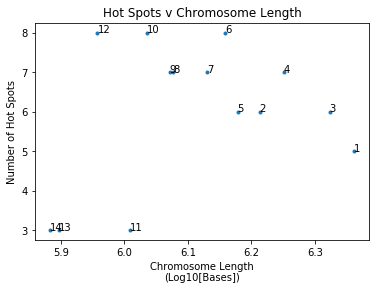

In [96]:
plt.plot(np.log10(clens),[len(a[a==True]) for a in new_test1_index],'.');
plt.ylabel('Number of Hot Spots');
plt.xlabel('Chromosome Length\n(Log10[Bases])');
for chrom in chrlist:
    plt.annotate(str(int(chrom[3:])),
                 (np.log10(clens[int(chrom[3:])-1]),
                 [len(a[a==True]) for a in new_test1_index][int(chrom[3:])-1]));
plt.title('Hot Spots v Chromosome Length');

In [97]:
ncold = len([a for a in np.concatenate(HoC_geno) if a in ['Blue']]);print ncold
nhot = len([a for a in np.concatenate(HoC_geno) if a in ['Red']]);print nhot

45
39


###### Check work

In [98]:
assert ncold + nhot == len([a for a in test1[0] if a == True])

## Extract IMI intervals For hotspots and cold spots and save for later analysis

## Hot spots

In [99]:
chrom_starts = [hotIMIdf[hotIMIdf.Chrom==chrom].W.min() for chrom in chrlist]

In [100]:
geno_hot_bins = []
geno_hot_in = []
for ch, HoC_chrom in enumerate(HoC_geno):
    hot_win = wind_bins[ch]
    chrom_bin = []
    chrom_hot = []
    for i, hcs in enumerate(HoC_chrom):
        if hcs == 'Red': ## Is a hot spot
            tV = hot_win[i]
            tW = hot_win[i+1]
            hotspot_in = hotIMIdf[(hotIMIdf.Chrom==chrlist[ch]) & 
                                 (hotIMIdf.V > tV) & 
                                  (hotIMIdf.W < tW)].index.tolist()
            chrom_bin.append(i)
            chrom_hot.append(hotspot_in)
    geno_hot_bins.append(i)
    geno_hot_in.append(chrom_hot)

In [101]:
len(geno_hot_in[3])

3

In [102]:
thefile = open('../FILES/Crypto-Hot-Spots-Index-%s-%s'%(ws,file_end), 'w')
for i in range(14):
    thefile.write("%s\n" % chrlist[i])
    for spot in geno_hot_in[i]:
        for ind in spot:
            thefile.write("%s," % ind)
        thefile.write("\n")
thefile.close()

## For cold spots

In [103]:
geno_cold_bins = []
geno_cold_in = []
for ch, HoC_chrom in enumerate(HoC_geno):
    chrom_bin = []
    chrom_cold = []
    hot_win = wind_bins[ch]
    for i, hcs in enumerate(HoC_chrom):
        if hcs == 'Blue': ## Is a cold spot 
            tV = hot_win[i]
            tW = hot_win[i+1]
            hotspot_in = hotIMIdf[(hotIMIdf.Chrom==chrlist[ch]) & 
                                 (hotIMIdf.V > tV) & 
                                  (hotIMIdf.W < tW)].index.tolist()
            chrom_bin.append(i)
            chrom_cold.append(hotspot_in)
    geno_cold_bins.append(chrom_bin)
    geno_cold_in.append(chrom_cold)

In [104]:
len(geno_cold_in[0])

3

In [105]:
thefile = open('../FILES/Crypto-Cold-Spots-Index-%s-%s'%(ws,file_end), 'w')
for i in range(14):
    thefile.write("%s\n" % chrlist[i])
    for spot in geno_cold_in[i]:
        for ind in spot:
            thefile.write("%s," % ind);
        thefile.write("\n")
thefile.close()

## Save IMI df for later use

In [106]:
hotIMIdf.to_csv('../FILES/Crypto-Genome-IMIxCO-%s'%file_end,index=False)

## Older code July 2

## Make dataframe of hot spot windows
### Display & Save

window_hot_spot_df = pd.DataFrame(columns=['Chrom','W','V'])
window_hot_spot_df['Chrom']= np.concatenate([[chrom for hot in hot_window[i]] 
                                             for i, chrom in enumerate(chrlist)]);
window_hot_spot_df['W'] = np.concatenate([[hot[0] for hot in hot_window[i]]
                                         for i,chrom in enumerate(chrlist)]);
window_hot_spot_df['V'] = np.concatenate([[hot[1] for hot in hot_window[i]]
                                         for i,chrom in enumerate(chrlist)]);
window_hot_spot_df.to_csv('../FILES/Crypto-Windows-Hotspots-df-pooled-%s-%s-%s'%(ws,s,file_end),
                          index=False)
window_hot_spot_df.tail()

## Make dataframe of hot spot windows for unicross

window_hot_spot_dfu = pd.DataFrame(columns=['Chrom','W','V'])
window_hot_spot_dfu['Chrom']= np.concatenate([[chrom for hot in hot_windowu[i]] 
                                             for i, chrom in enumerate(chrlist)]);
window_hot_spot_dfu['W'] = np.concatenate([[hot[0] for hot in hot_windowu[i]]
                                         for i,chrom in enumerate(chrlist)]);
window_hot_spot_dfu['V'] = np.concatenate([[hot[1] for hot in hot_windowu[i]]
                                         for i,chrom in enumerate(chrlist)]);
window_hot_spot_dfu.to_csv('../FILES/Crypto-Windows-Hotspots-df-uni-%s-%s-%s'%(ws,s,file_end),
                           index=False)
window_hot_spot_dfu.tail()

## Make dataframe of hot spot windows for bicross

window_hot_spot_dfb = pd.DataFrame(columns=['Chrom','W','V'])
window_hot_spot_dfb['Chrom']= np.concatenate([[chrom for hot in hot_windowb[i]] 
                                             for i, chrom in enumerate(chrlist)]);
window_hot_spot_dfb['W'] = np.concatenate([[hot[0] for hot in hot_windowb[i]]
                                         for i,chrom in enumerate(chrlist)]);
window_hot_spot_dfb['V'] = np.concatenate([[hot[1] for hot in hot_windowb[i]]
                                         for i,chrom in enumerate(chrlist)]);
window_hot_spot_dfb.to_csv('../FILES/Crypto-Windows-Hotspots-df-bi-%s-%s-%s'%(ws,s,file_end),
                           index=False);
window_hot_spot_dfb.tail()

## Print to file

hotspotfile = open('../FILES/Crypto-Windows-Hotspots-%s-%s-%s'%(ws,s,file_end),'w')
for i,chrom in enumerate(chrlist):
    hotspotfile.write("%s\n" % chrom)
    for win in hot_window[i]:
        hotspotfile.write("%s,%s\n" % win)
hotspotfile.close()

#### Old code

window = 100000
start = 0
slide = window/4.0
end = start + window
tempCOs = []
tempPos = []
tempWidths = []
while end < clens[int(my_chrom[3:])] + window:
    wintemp = temp[(temp.W >= start)&(temp.V <= start + window)]
    if len(wintemp) > 0:
        tempCOs.append(wintemp.XO.sum())
        tempWidths.append(int(wintemp.V.tolist()[-1]-wintemp.W.tolist()[0]))
    else:
        tempCOs.append(0)
        tempWidths.append(0)
    tempPos.append(np.mean([start,start+window]))
    start = start + slide
    end = start + window